In [1]:
suppressMessages(library("rwwa"))

# DSR attribution

In [2]:
nsamp = 1000
rp <- 35
varnm <- "dsr-june"

## CORDEX

In [3]:
fl <- list.files("ts_cordex", pattern = varnm, full.names = T)
for (fnm in fl) {
    
    mnm <- paste0(gsub(".dat","",strsplit(fnm, "_")[[1]][4:7]), collapse = "_")
    gmst_fnm <- list.files("ts_cordex", pattern = paste0("smoothed-gsat_", strsplit(fnm, "_")[[1]][5],"_rcp85_",substr(strsplit(fnm, "_")[[1]][6],1,2)), full.names = T)
    if(length(gmst_fnm) == 0) { cat("GMST missing:", mnm); next }
    
    # load data & combine all covariates with time series
    df <- merge(load_ts(fnm, col.names = c("year", "dsr")), load_ts(gmst_fnm, col.names = c("year", "gmst")))
    df$log_dsr <- log(df$dsr)
    mdl <- fit_ns("norm", "shift", df, "log_dsr", "gmst", lower = F)
    res_fnm <- paste0("res/res-cordex_logdsr_",mnm,".csv")
    
    if(!file.exists(res_fnm)) {
        
        # use model's 2023 GMST & observed Nino to define factual climate        
        cov_now <- df[df$year == 2024,"gmst",drop = F]
        cov_hist <- cov_now - 1.2
        cov_fut <- cov_now + 0.8

        # bootstrap results
        res <- cmodel_results(mdl, rp = rp, cov_f = cov_now, cov_hist = cov_hist, cov_fut = cov_fut,
                             y_now = 2024, y_start = 1979, y_fut = 2050, nsamp = nsamp, di_relative = T) # relative change in intensity is already adjusted back to original variable
        write.csv(res, res_fnm)
    }
    
    # quick return level plots to check fit
    rlplot_fnm <- gsub("csv", "png", gsub("res/", "mdl-eval/rlplot_", res_fnm))
    if(!file.exists(rlplot_fnm)) {
        png(rlplot_fnm, h = 360, w = 480); par(cex.main = 1.4); {
            plot_returnlevels(mdl, cov_f = cov_now, cov_cf = cov_hist, nsamp = 100, main = mnm)
        }; dev.off()
    }
}

In [5]:
# compile results
res <- t(sapply(list.files("res", pattern = "cordex_logdsr_", full.names = T), read.csv, row.names = "X"))
rownames(res) <- sapply(rownames(res), function(r) gsub(".csv","",paste0(strsplit(r, "_")[[1]][c(3,4,6)], collapse = "_")))
write.csv(res, "res-cordex_dsr-june.csv")

## CMIP6

In [4]:
fl <- list.files("ts_cmip6", pattern = varnm, full.names = T)
for (fnm in fl) {
    
    mnm <- gsub(".dat","",strsplit(fnm, "_")[[1]][5])
    gmst_fnm <- list.files("ts_cmip6", pattern = paste0("SGSAT2023.", mnm), full.names = T)
    if(length(gmst_fnm) == 0) { cat("GMST missing:", mnm,"\n"); next }
    
    # load data & combine all covariates with time series
    df <- merge(load_ts(fnm, col.names = c("year", "dsr")), load_ts(gmst_fnm, col.names = c("year", "gmst")))
    df$log_dsr <- log(df$dsr)
    mdl <- fit_ns("norm", "shift", df, "log_dsr", "gmst", lower = F)
    res_fnm <- paste0("res/res-cmip6_logdsr_",mnm,".csv")
    
    if(!file.exists(res_fnm)) {
        
        # use model's 2023 GMST & observed Nino to define factual climate        
        cov_now <- df[df$year == 2024,"gmst",drop = F]
        cov_hist <- cov_now - 1.2
        cov_fut <- cov_now + 0.8

        # bootstrap results
        res <- cmodel_results(mdl, rp = rp, cov_f = cov_now, cov_hist = cov_hist, cov_fut = cov_fut,
                             y_now = 2024, y_start = 1979, y_fut = 2050, nsamp = nsamp, di_relative = T) # relative change in intensity is already adjusted back to original variable
        write.csv(res, res_fnm)
    }
    
    # quick return level plots to check fit
    rlplot_fnm <- gsub("csv", "png", gsub("res/", "mdl-eval/rlplot_", res_fnm))
    if(!file.exists(rlplot_fnm)) {
        png(rlplot_fnm, h = 360, w = 480); par(cex.main = 1.4); {
            plot_returnlevels(mdl, cov_f = cov_now, cov_cf = cov_hist, nsamp = 100, main = mnm)
        }; dev.off()
    }
}

In [6]:
# compile results
res <- t(sapply(list.files("res", pattern = "cmip6_logdsr", full.names = T), read.csv, row.names = "X"))
rownames(res) <- sapply(rownames(res), function(r) gsub(".csv","",paste0(strsplit(r, "_")[[1]][3], collapse = "_")))
write.csv(res, "res-cmip6_dsr-june.csv")

---
# JJ-precip attribution

In [176]:
nsamp = 1000
rp <- 100

## CORDEX

In [177]:
fl <- list.files("ts_cordex", pattern = "pr-jj", full.names = T)
for (fnm in fl) {
    
    mnm <- paste0(gsub(".dat","",strsplit(fnm, "_")[[1]][4:7]), collapse = "_")
    gmst_fnm <- list.files("ts_cordex", pattern = paste0("smoothed-gsat_", strsplit(fnm, "_")[[1]][5],"_rcp85_",substr(strsplit(fnm, "_")[[1]][6],1,2)), full.names = T)
    if(length(gmst_fnm) == 0) { cat("GMST missing:", mnm); next }
    
    # load data & combine all covariates with time series
    df <- merge(load_ts(fnm, col.names = c("year", "pr")), load_ts(gmst_fnm, col.names = c("year", "gmst")))
    mdl <- fit_ns("norm", "fixeddisp", df, "pr", "gmst", lower = T)
    res_fnm <- paste0("res/res-cordex_pr-jj_",mnm,".csv")
    
    if(!file.exists(res_fnm)) {
        
        # use model's 2023 GMST & observed Nino to define factual climate        
        cov_now <- df[df$year == 2024,"gmst",drop = F]
        cov_hist <- cov_now - 1.2
        cov_fut <- cov_now + 0.8

        # bootstrap results
        res <- cmodel_results(mdl, rp = rp, cov_f = cov_now, cov_hist = cov_hist, cov_fut = cov_fut,
                             y_now = 2024, y_start = 1979, y_fut = 2050, nsamp = nsamp)
        write.csv(res, res_fnm)
    }
    
    # quick return level plots to check fit
    rlplot_fnm <- gsub("csv", "png", gsub("res/", "mdl-eval/rlplot_", res_fnm))
    if(!file.exists(rlplot_fnm)) {
        png(rlplot_fnm, h = 360, w = 480); par(cex.main = 1.4); {
            plot_returnlevels(mdl, cov_f = cov_now, cov_cf = cov_hist, nsamp = 100, main = mnm)
        }; dev.off()
    }
}

In [178]:
# compile results
res <- t(sapply(list.files("res", pattern = "cordex_pr-jj", full.names = T), read.csv, row.names = "X"))
rownames(res) <- sapply(rownames(res), function(r) gsub(".csv","",paste0(strsplit(r, "_")[[1]][c(3,4,6)], collapse = "_")))
write.csv(res, "res-cordex_pr-jj.csv")

## CMIP6

In [180]:
fl <- list.files("ts_cmip6", pattern = "pr-jj", full.names = T)
for (fnm in fl) {
    
    mnm <- gsub(".dat","",strsplit(fnm, "_")[[1]][5])
    gmst_fnm <- list.files("ts_cmip6", pattern = paste0("SGSAT2023.", mnm), full.names = T)
    if(length(gmst_fnm) == 0) { cat("GMST missing:", mnm); next }
    
    # load data & combine all covariates with time series
    df <- merge(load_ts(fnm, col.names = c("year", "pr")), load_ts(gmst_fnm, col.names = c("year", "gmst")))
    mdl <- fit_ns("norm", "fixeddisp", df, "pr", "gmst", lower = T)
    res_fnm <- paste0("res/res-cmip6_pr-jj_",mnm,".csv")
    
    if(!file.exists(res_fnm)) {
        
        # use model's 2023 GMST & observed Nino to define factual climate        
        cov_now <- df[df$year == 2024,"gmst",drop = F]
        cov_hist <- cov_now - 1.2
        cov_fut <- cov_now + 0.8

        # bootstrap results
        res <- cmodel_results(mdl, rp = rp, cov_f = cov_now, cov_hist = cov_hist, cov_fut = cov_fut,
                             y_now = 2024, y_start = 1979, y_fut = 2050, nsamp = nsamp)
        write.csv(res, res_fnm)
    }
    
    # quick return level plots to check fit
    rlplot_fnm <- gsub("csv", "png", gsub("res/", "mdl-eval/rlplot_", res_fnm))
    if(!file.exists(rlplot_fnm)) {
        png(rlplot_fnm, h = 360, w = 480); par(cex.main = 1.4); {
            plot_returnlevels(mdl, cov_f = cov_now, cov_cf = cov_hist, nsamp = 100, main = mnm)
        }; dev.off()
    }
}

In [181]:
# compile results
res <- t(sapply(list.files("res", pattern = "cmip6_pr-jj", full.names = T), read.csv, row.names = "X"))
rownames(res) <- sapply(rownames(res), function(r) gsub(".csv","",paste0(strsplit(r, "_")[[1]][3], collapse = "_")))
write.csv(res, "res-cmip6_pr-jj.csv")

---
# Synthesis

## June DSR

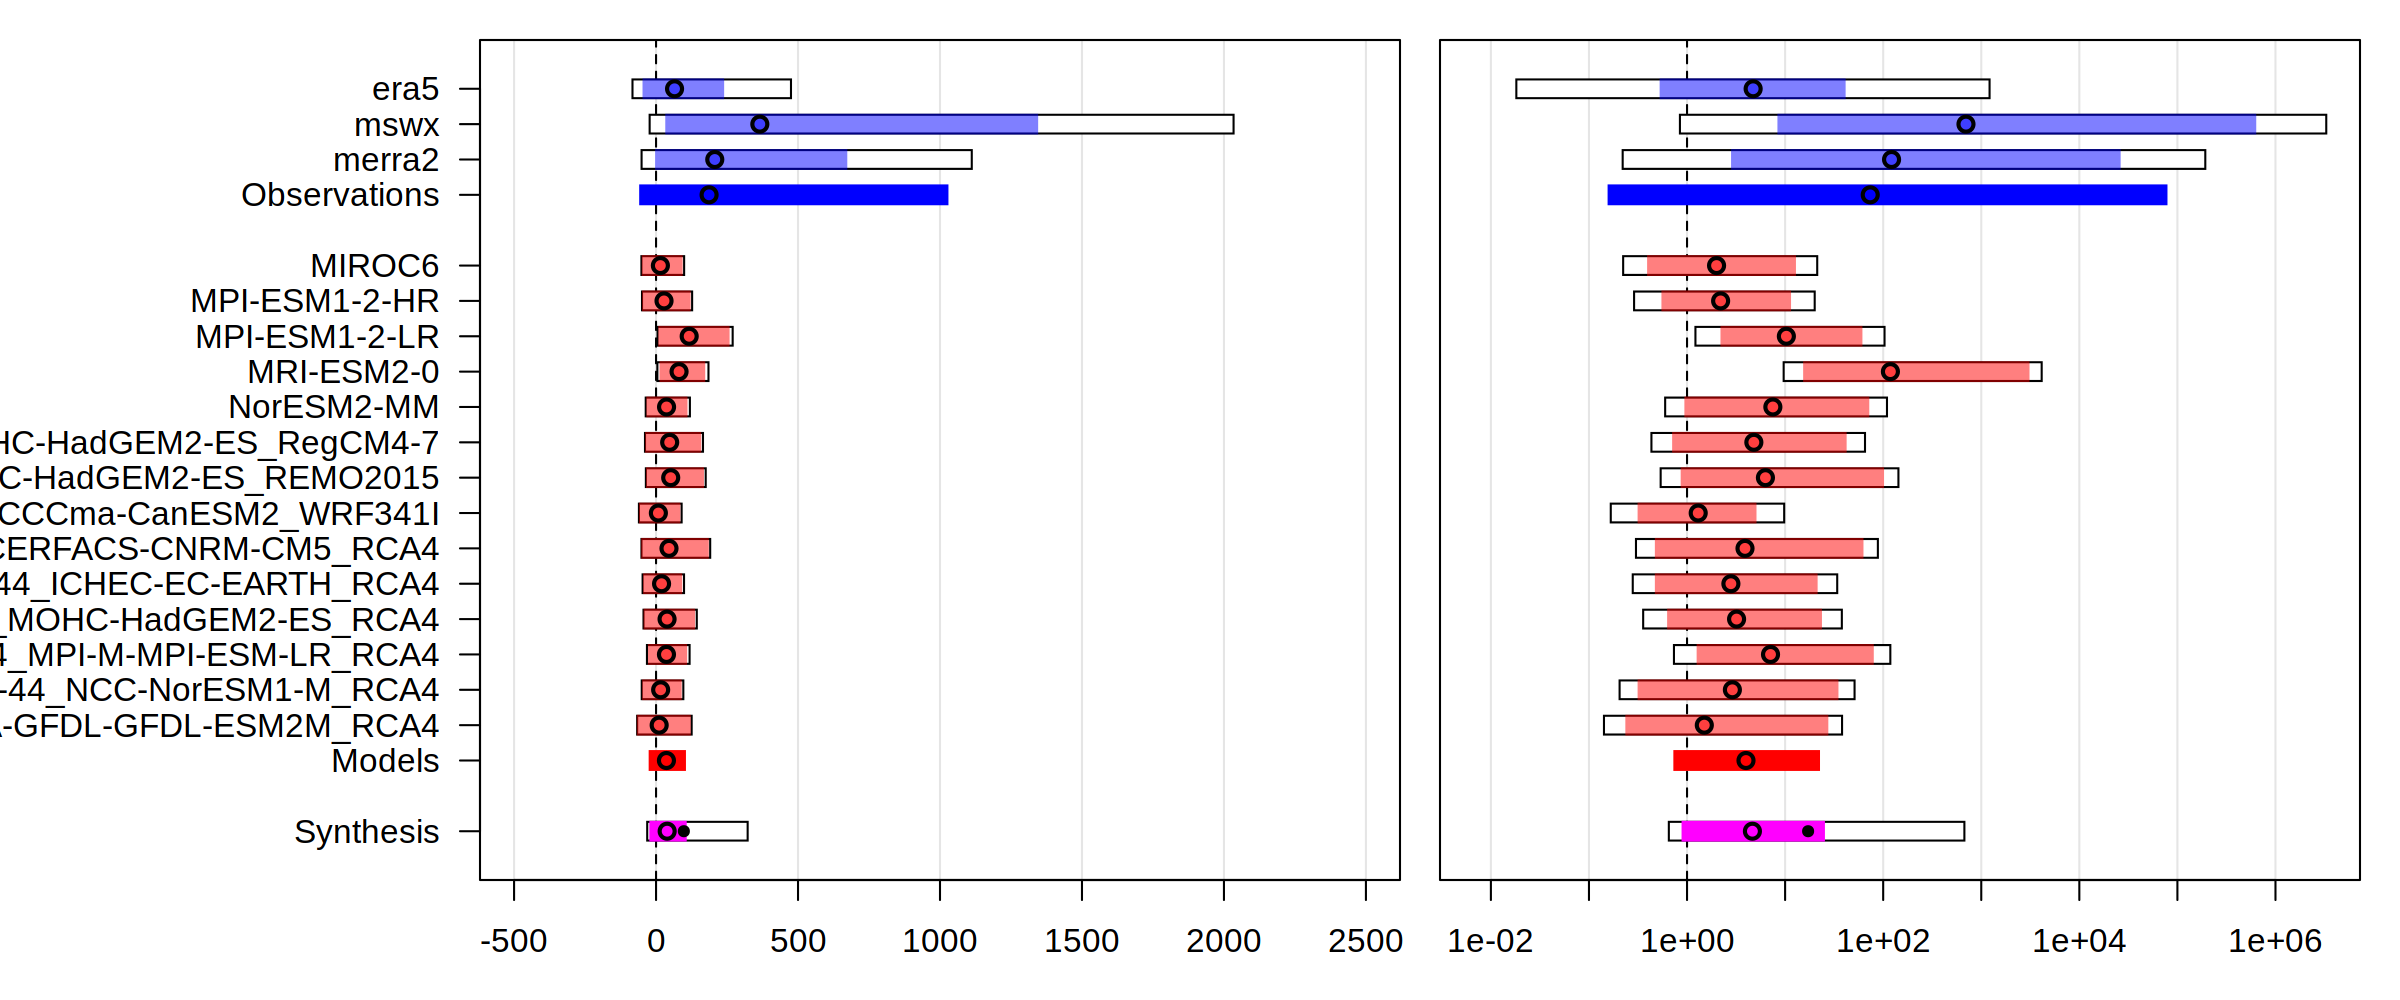

In [14]:
varnm <- "dsr-june"

obs_datasets <- switch(varnm, "dsr-june" = c("era5", "mswx", "merra2"), "pr-jj" = c("era5", "mswx", "chirps"))

obs_res <- read.csv(paste0("res-obs_",varnm,".csv"), row.names = "X")
obs_res <- obs_res[obs_datasets,]

model_res <- read.csv("model-res_logdsr.csv", row.names = "Model")
model_res <- model_res[model_res$include == "Y",]

synth_dI_attr <- synthesis(obs_res[,grepl("dI.rel.pi", colnames(obs_res))], model_res[,grepl("attr_dI.rel", colnames(model_res))], synth_type = "rel")
synth_dI_proj <- synthesis(obs_in = NA, model_res[,grepl("proj_dI.rel", colnames(model_res))], synth_type = "rel")

synth_PR_attr <- synthesis(obs_res[,grepl("PR.pi", colnames(obs_res))], model_res[,grepl("attr_PR", colnames(model_res))], synth_type = "PR")
synth_PR_proj <- synthesis(obs = NA, model_res[,grepl("proj_PR", colnames(model_res))], synth_type = "PR")

# save everything as .csv for easier plotting in Python
for(a in c("dI", "PR")) for (b in c("attr", "proj")) {
    s <- paste0(a,"_",b)
    write.csv(get(paste0("synth_",s))$df, paste0("synthesis/synth_",varnm,"_",s,".csv"), row.names = F)
}

prep_window(c(1,2), h = 5, w = 6, oma = c(0,12,0,0), mar = c(3,0,1,1))
plot_synthesis(synth_dI_attr)
points(synth_dI_attr$uw_mean, 0)
plot_synthesis(synth_PR_attr, hide_labels = T, log = T)
points(synth_PR_attr$uw_mean, 0)

In [48]:
# version with rejected obs for appendix
varnm <- "dsr-june"

obs_res <- read.csv(paste0("res-obs_",varnm,".csv"), row.names = "X")
obs_res <- obs_res[c("era5", "mswx", "merra2"),]

model_res <- read.csv("model-res_logdsr.csv", row.names = "Model")
model_res <- model_res[model_res$include == "Y",]

synth_dI_attr <- synthesis(obs_res[,grepl("dI.rel.pi", colnames(obs_res))], model_res[,grepl("attr_dI.rel", colnames(model_res))], synth_type = "rel")
synth_dI_proj <- synthesis(obs_in = NA, model_res[,grepl("proj_dI.rel", colnames(model_res))], synth_type = "rel")

synth_PR_attr <- synthesis(obs_res[,grepl("PR.pi", colnames(obs_res))], model_res[,grepl("attr_PR", colnames(model_res))], synth_type = "PR")
synth_PR_proj <- synthesis(obs = NA, model_res[,grepl("proj_PR", colnames(model_res))], synth_type = "PR")

# save everything as .csv for easier plotting in Python
for(a in c("dI", "PR")) for (b in c("attr", "proj")) {
    s <- paste0("synth_",a,"_",b)
    write.csv(get(s)$df, paste0("synthesis/appendix_",s,"_",varnm,".csv"), row.names = F)
}

In [41]:
png("fig/synthesis_DSR_attr.png", height = 360, width = 360*3); {
    prep_window(c(1,2), h = 5, w = 6, oma = c(0,20,0,0), mar = c(4,0,1,1))
    plot_synthesis(synth_dI_attr)
    mtext("% change in intensity", side = 1, line = 2.5)
    
    plot_synthesis(synth_PR_attr, hide_labels = T, log = T)
    mtext("Probability ratio", side = 1, line = 2.5)
}; dev.off()

png 
  2

In [42]:
png("fig/synthesis_DSR_proj.png", height = 360, width = 360*3); {
    prep_window(c(1,2), h = 5, w = 6, oma = c(0,20,0,0), mar = c(4,0,1,1))
    plot_synthesis(synth_dI_proj)
    mtext("% change in intensity", side = 1, line = 2.5)
    
    plot_synthesis(synth_PR_proj, hide_labels = T, log = T)
    mtext("Probability ratio", side = 1, line = 2.5)
}; dev.off()

ERROR: Error in xy.coords(x, y): 'x' and 'y' lengths differ


png 
  2

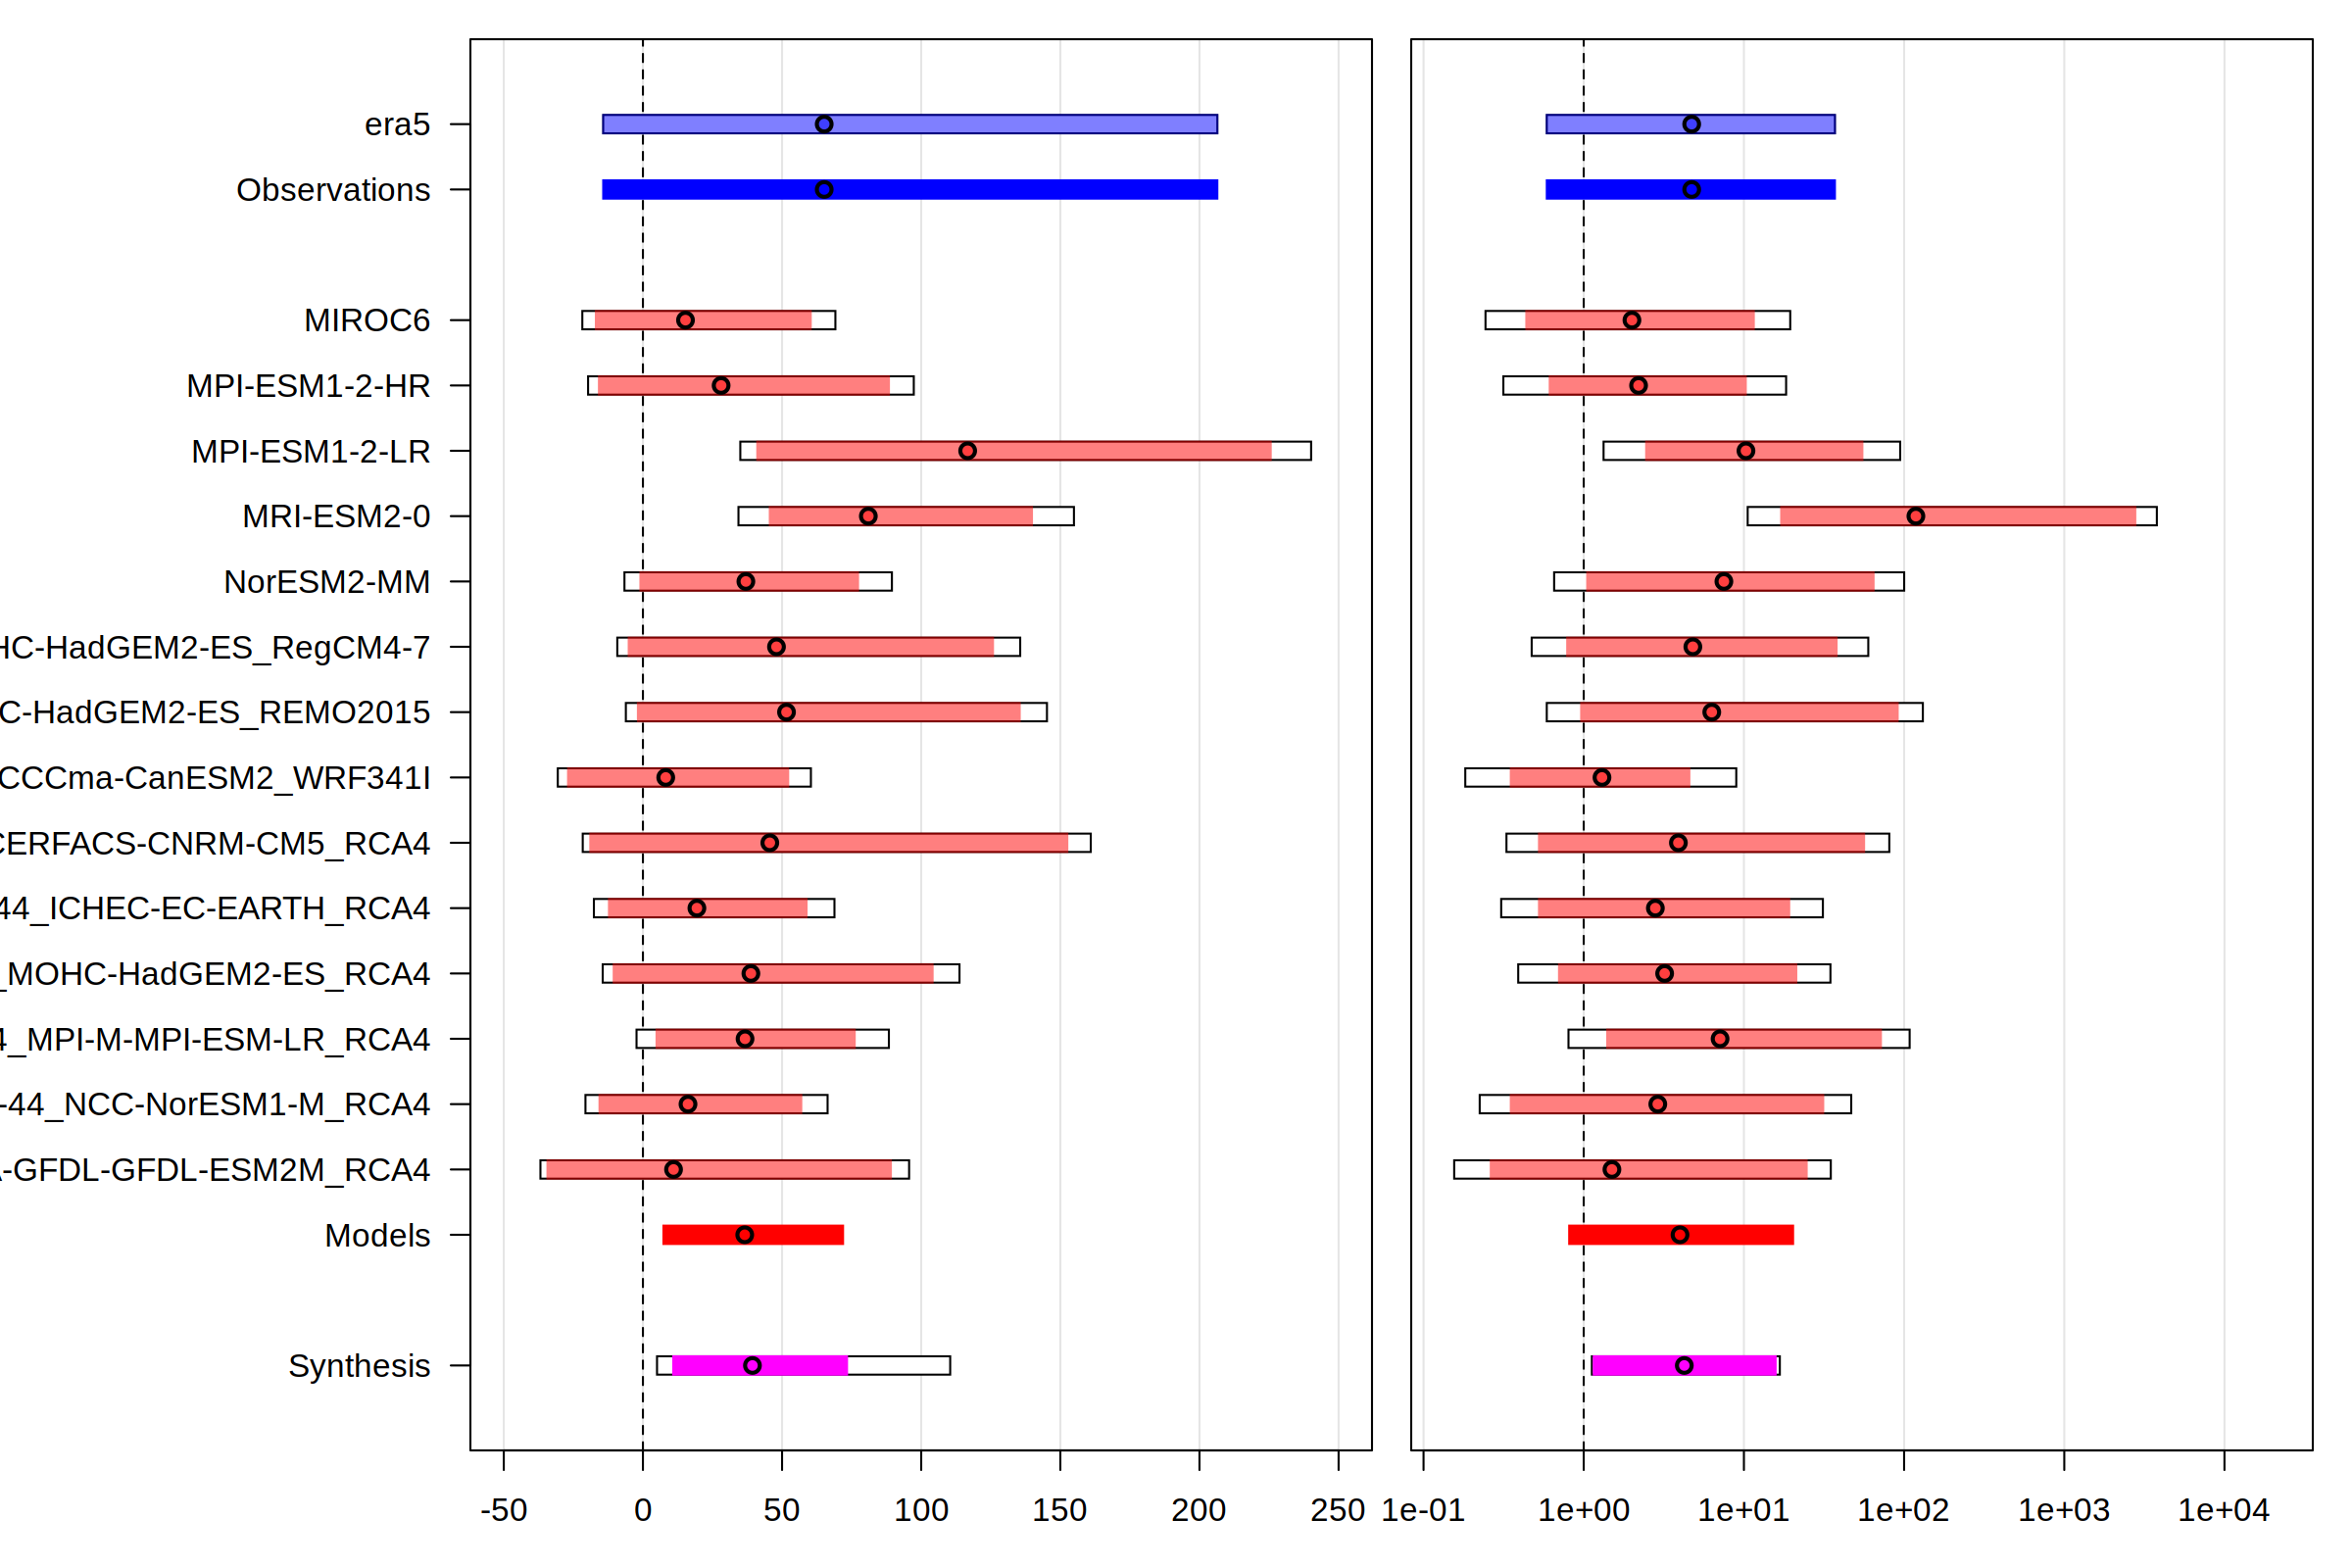

In [53]:
# synthesis with era5
obs_res <- read.csv(paste0("res-obs_",varnm,".csv"), row.names = "X")["era5",]
model_res <- read.csv("model-res_logdsr.csv", row.names = "Model")
model_res <- model_res[model_res$include == "Y",]

synth_PR_attr <- synthesis(obs_res[,grepl("PR.pi", colnames(obs_res))], model_res[,grepl("attr_PR", colnames(model_res))], synth_type = "PR")
synth_dI_attr <- synthesis(obs_res[,grepl("dI.rel.pi", colnames(obs_res))], model_res[,grepl("attr_dI.rel", colnames(model_res))], synth_type = "rel")

for(a in c("dI", "PR")) {
    s <- paste0("synth_",a,"_attr")
    write.csv(get(s)$df, paste0("synthesis/synth_",varnm,"_",s,".csv"), row.names = F)
}

prep_window(c(1,2), h = 8, w = 6, oma = c(0,12,0,0), mar = c(3,0,1,1))
plot_synthesis(synth_dI_attr)
plot_synthesis(synth_PR_attr, hide_labels = T, log = T)

## Annual precip

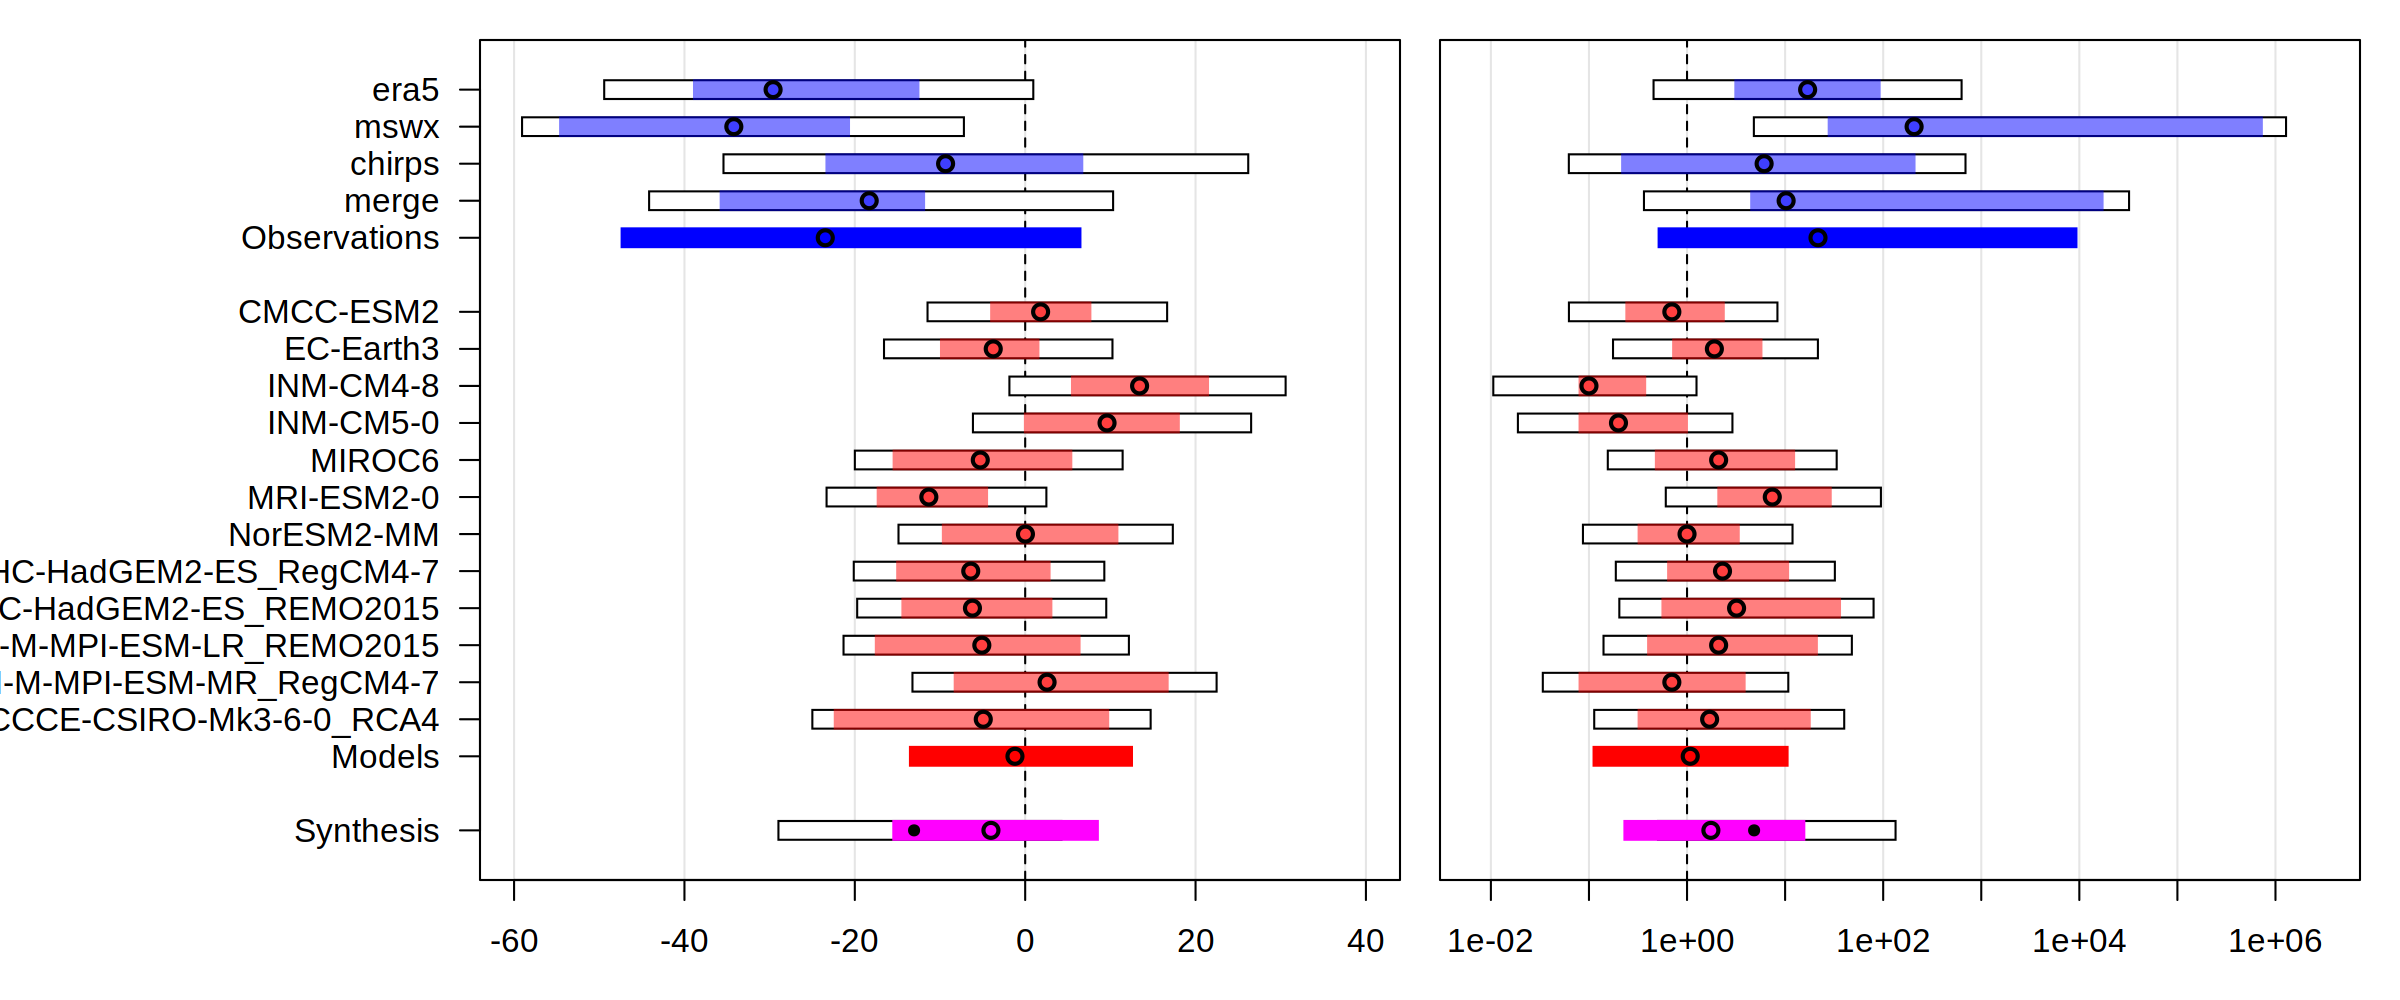

In [13]:
varnm <- "pr-jj"

obs_res <- read.csv(paste0("res-obs_pr-jj.csv"), row.names = "X")
obs_res <- obs_res[c("era5", "mswx","chirps","merge"),]

model_res <- read.csv(paste0("model-res_",varnm,".csv"), row.names = "Model")
model_res <- model_res[model_res$include == "Y",]

synth_dI_attr <- synthesis(obs_res[,grepl("dI.rel.pi", colnames(obs_res))], model_res[,grepl("attr_dI.rel", colnames(model_res))], synth_type = "rel")
synth_dI_proj <- synthesis(obs_in = NA, model_res[,grepl("proj_dI.rel", colnames(model_res))], synth_type = "rel")

synth_PR_attr <- synthesis(obs_res[,grepl("PR.pi", colnames(obs_res))], model_res[,grepl("attr_PR", colnames(model_res))], synth_type = "PR")
synth_PR_proj <- synthesis(obs = NA, model_res[,grepl("proj_PR", colnames(model_res))], synth_type = "PR")

# save everything as .csv for easier plotting in Python
for(a in c("dI", "PR")) for (b in c("attr", "proj")) {
    s <- paste0(a,"_",b)
    write.csv(get(paste0("synth_",s))$df, paste0("synthesis/synth_",varnm,"_",s,".csv"), row.names = F)
}

prep_window(c(1,2), h = 5, w = 6, oma = c(0,12,0,0), mar = c(3,0,1,1))
plot_synthesis(synth_dI_attr)
points(synth_dI_attr$uw_mean, 0)
plot_synthesis(synth_PR_attr, log = T, hide_labels = T)
points(synth_PR_attr$uw_mean, 0)

In [12]:
synth_dI_attr$uw_mean

est 
-13.04385

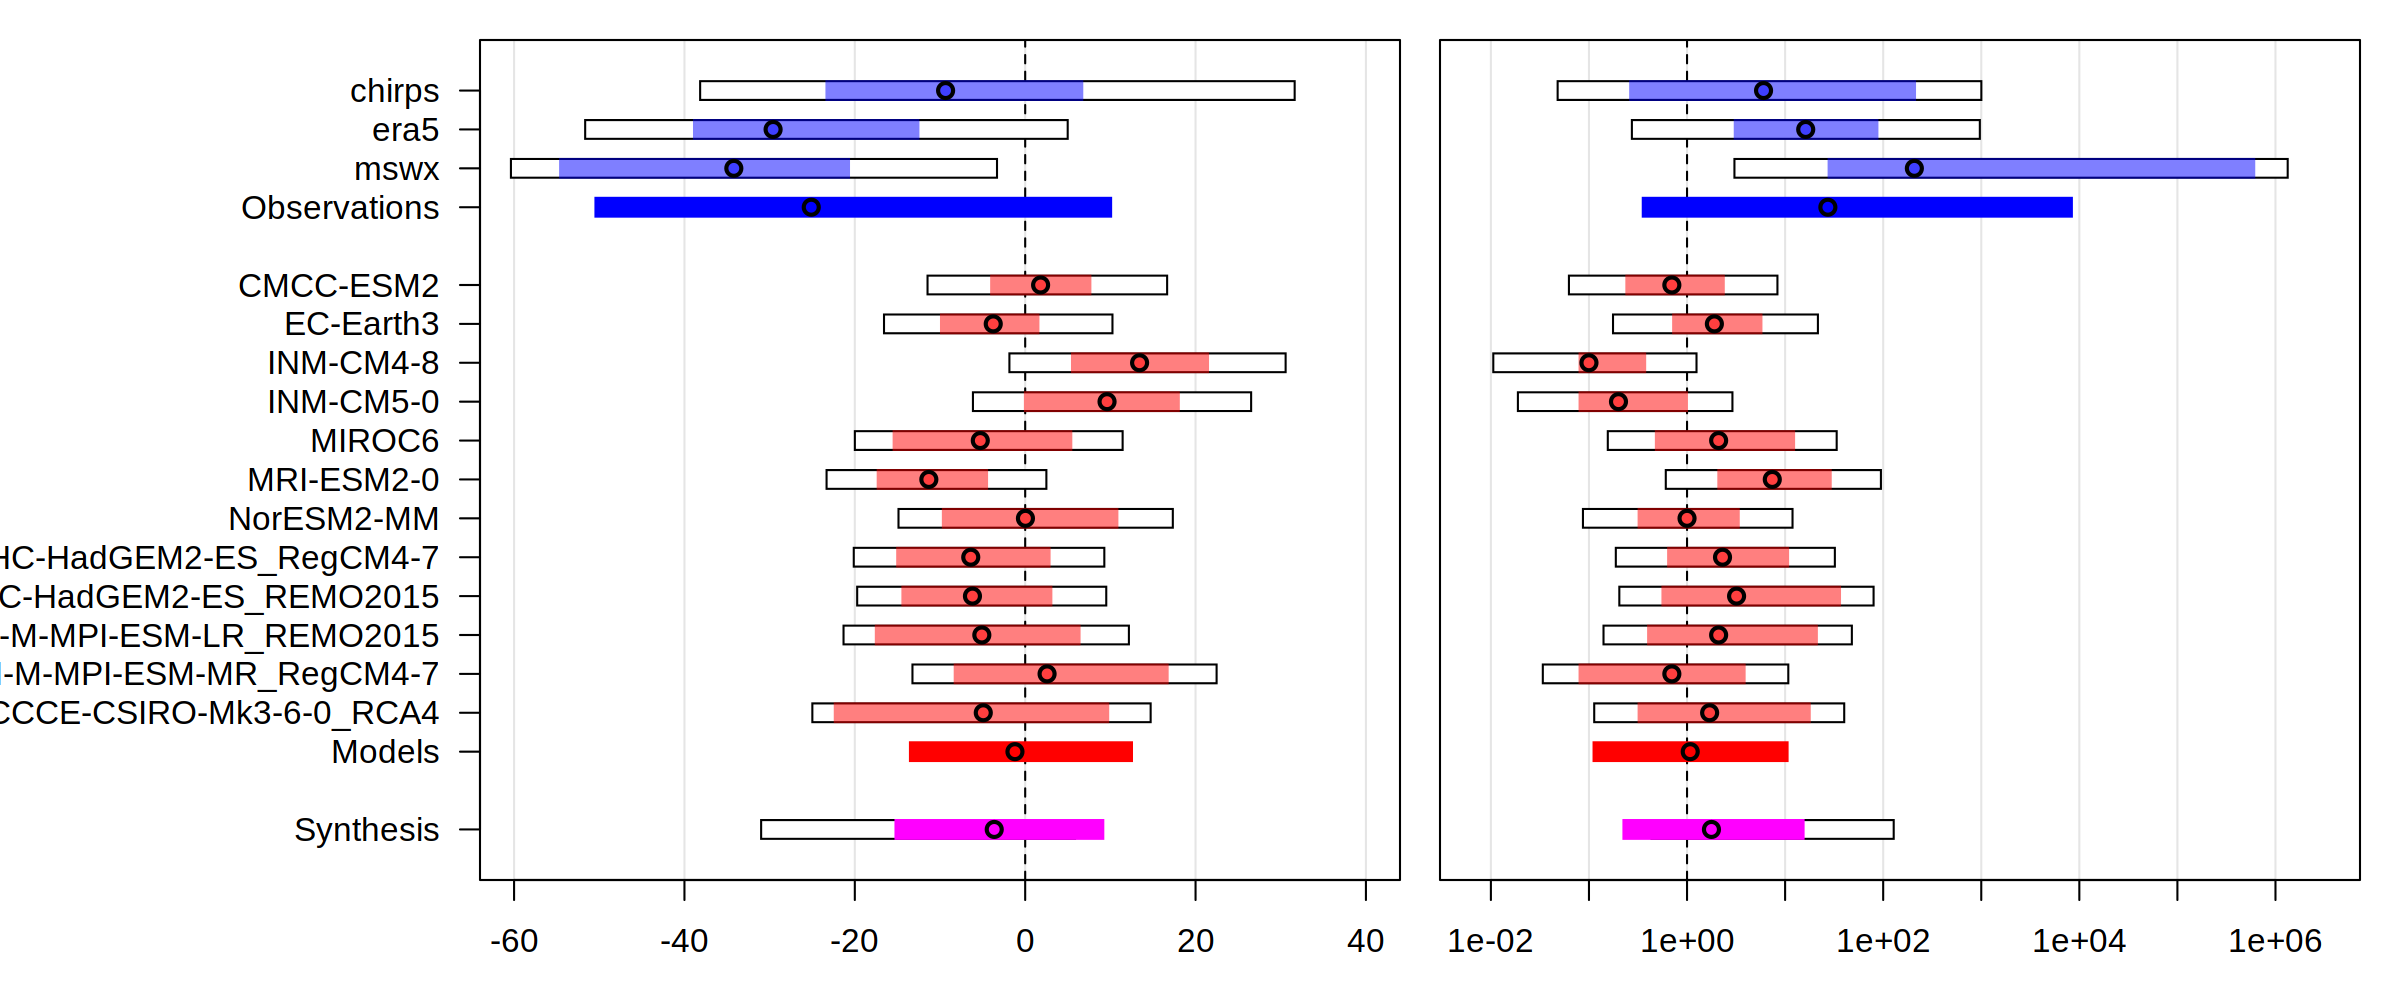

In [4]:
varnm <- "pr-jj"

obs_res <- read.csv(paste0("res-obs_pr-jj-rp100.csv"), row.names = "X")
obs_res <- obs_res[c("chirps", "era5", "mswx"),]

model_res <- read.csv(paste0("model-res_",varnm,".csv"), row.names = "Model")
model_res <- model_res[model_res$include == "Y",]

synth_dI_attr <- synthesis(obs_res[,grepl("dI.rel.pi", colnames(obs_res))], model_res[,grepl("attr_dI.rel", colnames(model_res))], synth_type = "rel")
synth_dI_proj <- synthesis(obs_in = NA, model_res[,grepl("proj_dI.rel", colnames(model_res))], synth_type = "rel")

synth_PR_attr <- synthesis(obs_res[,grepl("PR.pi", colnames(obs_res))], model_res[,grepl("attr_PR", colnames(model_res))], synth_type = "PR")
synth_PR_proj <- synthesis(obs = NA, model_res[,grepl("proj_PR", colnames(model_res))], synth_type = "PR")

# save everything as .csv for easier plotting in Python
for(a in c("dI", "PR")) for (b in c("attr", "proj")) {
    s <- paste0("synth_",a,"_",b)
    write.csv(get(s)$df, paste0("synthesis/appendix_",varnm,"_",s,".csv"), row.names = F)
}

prep_window(c(1,2), h = 5, w = 6, oma = c(0,12,0,0), mar = c(3,0,1,1))
plot_synthesis(synth_dI_attr)
plot_synthesis(synth_PR_attr, hide_labels = T, log = T)

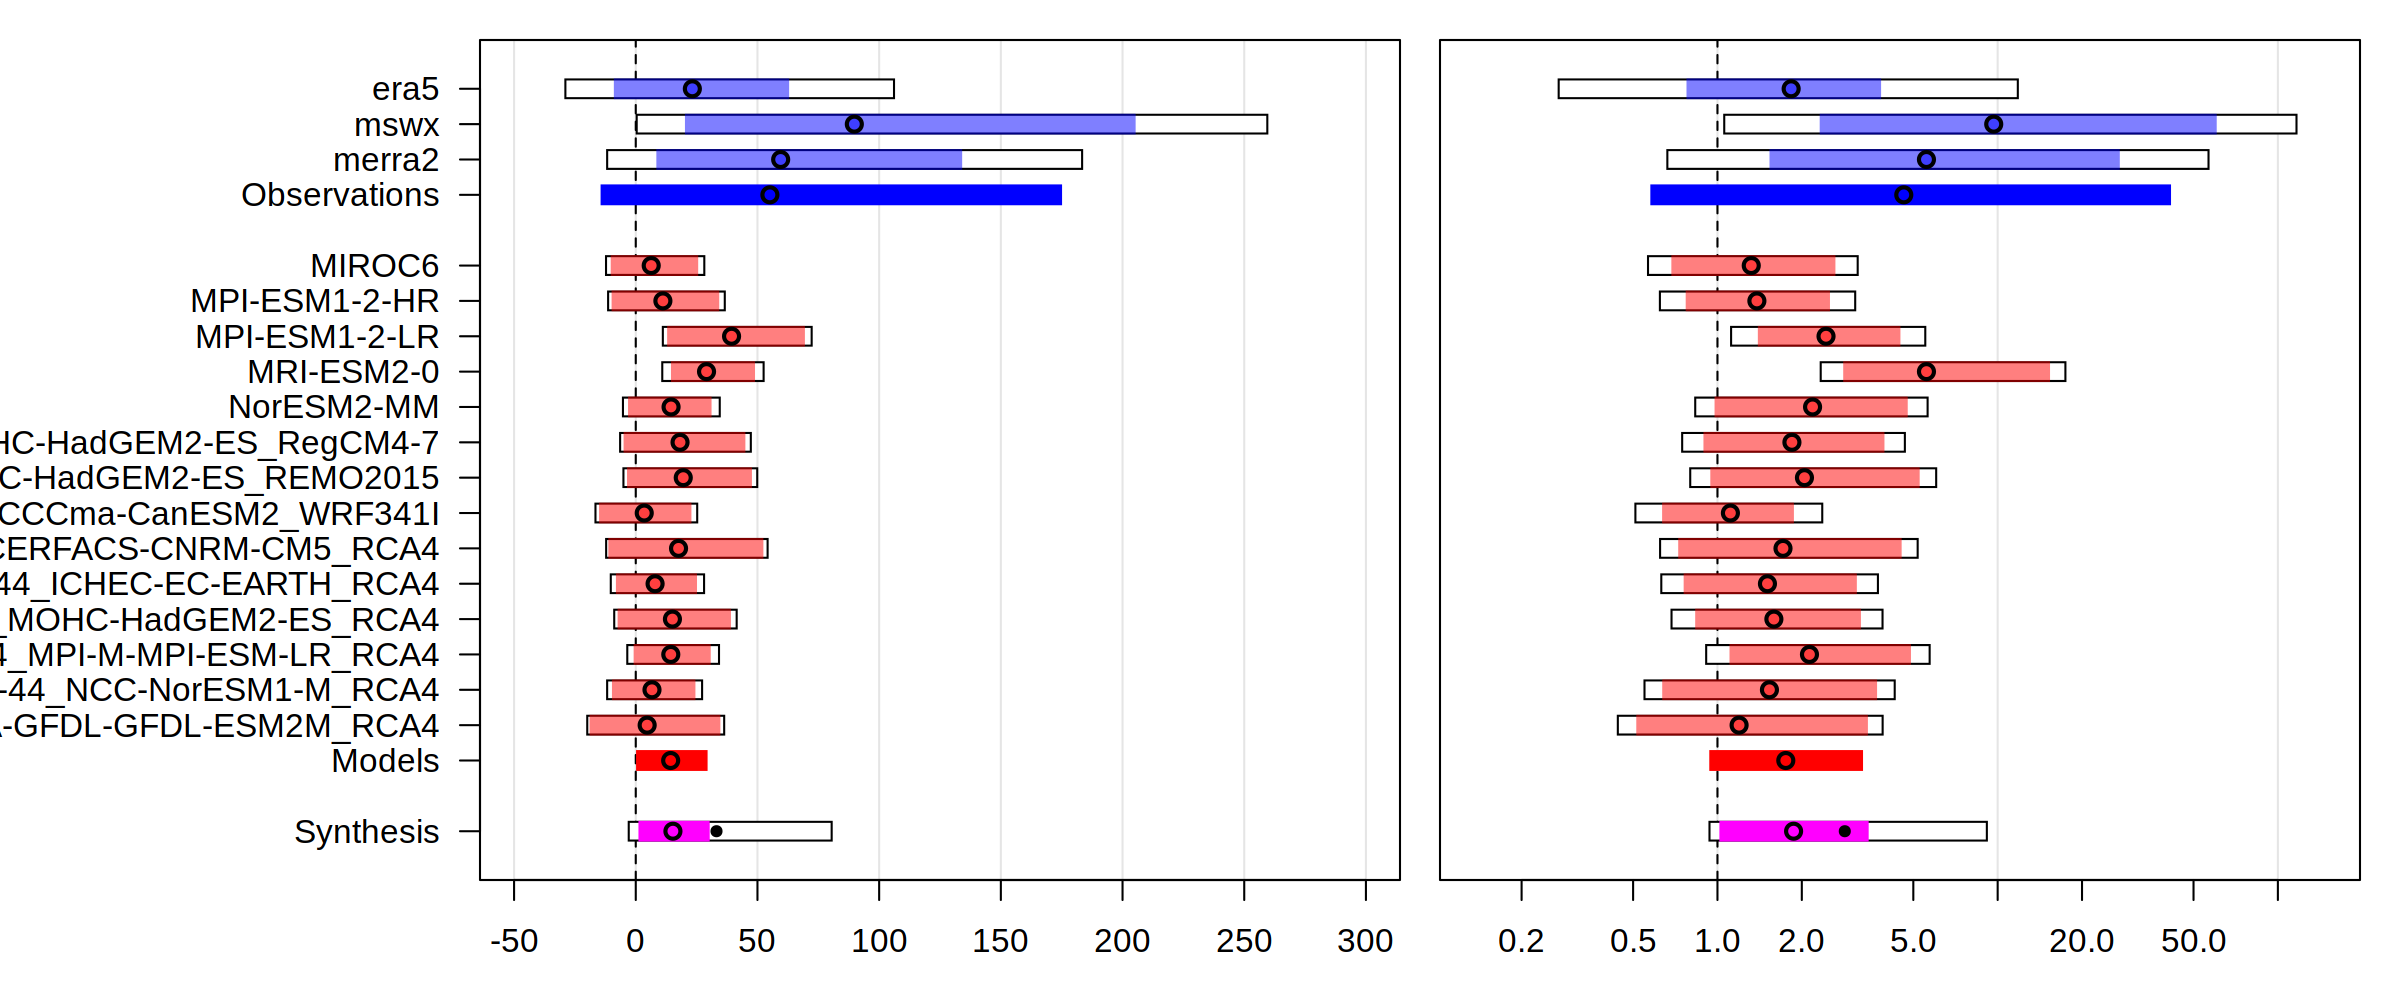

In [15]:
varnm <- "dsr-june"

obs_datasets <- switch(varnm, "dsr-june" = c("era5", "mswx", "merra2"), "pr-jj" = c("era5", "mswx", "chirps"))

obs_res <- read.csv(paste0("res-obs_",varnm,".csv"), row.names = "X")
obs_res <- obs_res[obs_datasets,]

model_res <- rbind(read.csv("res-cordex_dsr-june-2000.csv", row.names = "X"), read.csv("res-cmip6_dsr-june-2000.csv", row.names = "X"))

mlist <- read.csv("model-res_logdsr.csv", row.names = "Model")
mlist <- rownames(mlist[mlist$include == "Y",])

synth_dI_attr <- synthesis(obs_res[,grepl("dI.rel.2000", colnames(obs_res))], model_res[mlist,grepl("attr_dI.rel", colnames(model_res))], synth_type = "rel")
synth_dI_proj <- synthesis(obs_in = NA, model_res[,grepl("proj_dI.rel", colnames(model_res))], synth_type = "rel")

synth_PR_attr <- synthesis(obs_res[,grepl("PR.2000", colnames(obs_res))], model_res[mlist,grepl("attr_PR", colnames(model_res))], synth_type = "PR")
synth_PR_proj <- synthesis(obs = NA, model_res[,grepl("proj_PR", colnames(model_res))], synth_type = "PR")

# save everything as .csv for easier plotting in Python
for(a in c("dI", "PR")) for (b in c("attr", "proj")) {
    s <- paste0(a,"_",b)
    write.csv(get(paste0("synth_",s))$df, paste0("synthesis/synth_",varnm,"-2000_",s,"-2000.csv"), row.names = F)
}

prep_window(c(1,2), h = 5, w = 6, oma = c(0,12,0,0), mar = c(3,0,1,1))
plot_synthesis(synth_dI_attr)
points(synth_dI_attr$uw_mean, 0)
plot_synthesis(synth_PR_attr, hide_labels = T, log = T)
points(synth_PR_attr$uw_mean, 0)